# 184.702 Machine Learning 2019S
## Assignment 1: Classification experiments
#### Prepared by: Aleksandra Radecka (e11847505), Niklas Speckle (e1515258) and Nazika Moeininia (e1535524)

### 1. Aim of the exercise

### 2. Datasets' description

In [1]:
##1 importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50

In [2]:
##2 creating pdDataFrame
kick_ds = pd.read_csv(r"kick.csv")

In [3]:
##3 cleaning pdDataFrame
# transforming empty cells to no data values
cols=kick_ds.columns
for elem in cols:
    kick_ds[elem] = kick_ds[elem].replace("?", np.nan)

In [4]:
# transforming dtypes (object dtype to int, float, date, categorical) 
num_cols=["VehYear", "VehicleAge", "VehOdo", "MMRAcquisitionAuctionAveragePrice", \
    "MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionRetailAveragePrice", "MMRAcquisitonRetailCleanPrice", \
        "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice", "MMRCurrentRetailAveragePrice", \
            "MMRCurrentRetailCleanPrice", "BYRNO", "VehBCost", "WarrantyCost"]
cat_cols=["IsBadBuy", "Auction", "Make", "Model", "Trim", "SubModel", "Color", \
    "Transmission", "WheelTypeID", "WheelType", "Nationality", "Size", "TopThreeAmericanName", \
        "PRIMEUNIT", "AUCGUART", "VNZIP1", "VNST", "IsOnlineSale"]
str_cols=["Auction", "Make", "Model", "Trim", "SubModel", "Color", \
    "Transmission", "WheelType", "Nationality", "Size", "TopThreeAmericanName", \
        "PRIMEUNIT", "AUCGUART", "VNST"] #str_cols is the subset of cat_cols, the ones being a text

In [5]:
for elem in num_cols:
    kick_ds[elem] = pd.to_numeric(kick_ds[elem])

for elem in cat_cols:
    kick_ds[elem] = kick_ds[elem].astype("category")

kick_ds["PurchDate"] = pd.to_datetime(kick_ds["PurchDate"])

In [6]:
# converting all categorical string (text) values to uppercase
for elem in str_cols:
    kick_ds[elem] = kick_ds[elem].str.upper()

In [7]:
##4 info about each feature
# feature's data type
kick_ds.dtypes
kick_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 33 columns):
IsBadBuy                             72983 non-null category
PurchDate                            72983 non-null datetime64[ns]
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null category
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationality                          72978 non-null obje

In [8]:
# number of missing values in each feature
mv = kick_ds.isna().sum()
mv

IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentR

In [9]:
# statistics for numeric features
kick_ds.describe()

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72915.000000,72983.000000
mean,2005.343052,4.176644,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,6729.249949,1276.580985
std,1.731252,1.712210,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,1764.962643,598.846788
min,2001.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,1.000000,462.000000
25%,2004.000000,3.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,5430.000000,837.000000
50%,2005.000000,4.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,6700.000000,1155.000000
75%,2007.000000,5.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,7900.000000,1623.000000
max,2010.000000,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,45469.000000,7498.000000


In [10]:
# statistics for category features
kick_ds[cat_cols].describe()

,IsBadBuy,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNZIP1,VNST,IsOnlineSale
count,72983,72983,72983,72983,70623,72975,72975,72974,69814,69809,72978,72978,72978,3419,3419,72983,72983,72983
unique,2,3,33,1063,133,863,16,2,4,3,4,12,4,2,2,153,37,2
top,0,MANHEIM,CHEVROLET,PT CRUISER,BAS,4D SEDAN,SILVER,AUTO,1,ALLOY,AMERICAN,MEDIUM,GM,NO,GREEN,32824,TX,0
freq,64007,41043,17248,2329,13950,15236,14875,70398,36050,36050,61028,30785,25314,3357,3340,3699,13596,71138


In [11]:
##5 general info about the dataset
# number of samples
n_samples = kick_ds.shape[0]
n_samples

72983

In [12]:
# number of features (attributes)
n_att = kick_ds.shape[1]
n_att

33

In [13]:
# number of classes == unique values in the selected attribute 
n_cl = kick_ds.loc[:,"IsBadBuy"].unique().shape[0]
n_cl

2

In [14]:
# missing values => how many mv present in ds, in how many features
np.sum(mv), mv[mv.values!=0].shape[0]

(149271, 20)

In [15]:
##6 graphs
# graphs for category features - "IsBadBuy" and "Make"
prop_tables = []
for variable in cat_cols:
    tab = pd.crosstab(kick_ds[variable], columns="count")
    rel_tab = tab/tab.sum()
    prop_tables.append(rel_tab)

prop_tables[0]

col_0,count
IsBadBuy,
0,0.877012
1,0.122988


In [16]:
prop_tables[2]

col_0,count
Make,
ACURA,0.000452
BUICK,0.009865
CADILLAC,0.000452
CHEVROLET,0.236329
CHRYSLER,0.121179
DODGE,0.176918
FORD,0.154899
GMC,0.008892
HONDA,0.006810


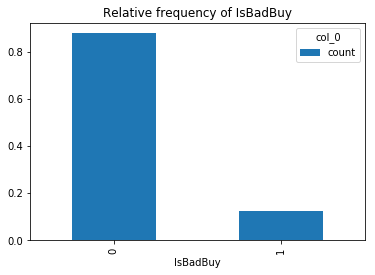

In [17]:
prop_tables[0].plot(kind="bar",title="Relative frequency of IsBadBuy")

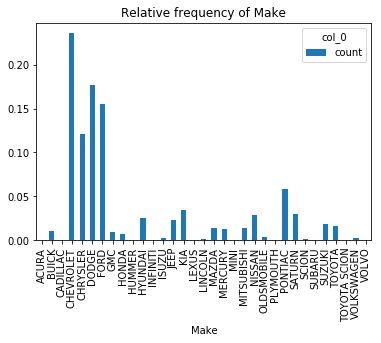

In [18]:
prop_tables[2].plot(kind="bar", title="Relative frequency of Make")

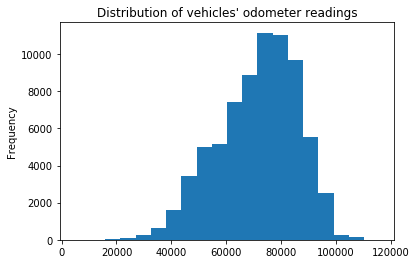

In [19]:
# graphs for numeric features - "VehOdo" and "VehBCost"
kick_ds.VehOdo.plot(kind="hist", title="Distribution of vehicles' odometer readings", bins = 20)

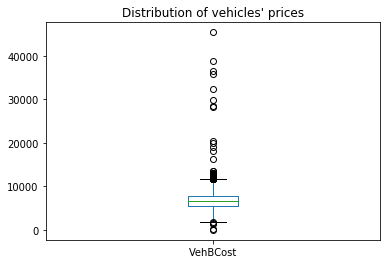

In [20]:
kick_ds.VehBCost.plot(kind="box", title="Distribution of vehicles' prices")

### 3. Selected classifiers and performance measures

### 4. Classifications

In [21]:
##1 importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.exceptions import DataConversionWarning

In [22]:
##2 selecting a sample of data
kick_ds_s = kick_ds.sample(frac=0.03, random_state=100)

In [23]:
##3 defining target class feature (Ydata) and explanatory features (Xdata)
# "IsBadBuy" feature
Ydata_s = kick_ds_s.iloc[:,0]
Ydata_s = Ydata_s.astype(str)

"""
All features apart from "PurchDate", "VehYear" (both correlated with VehicleAge), 
"WheelTypeID" (directly correlated with WheelType) 
and "VNST" (correlated with "VNZIP1 and less detailed than it)"
"""
Xdata_s = kick_ds_s.iloc[:,[2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32]]


#### 4.1. kNN classifier implementation

In [24]:
# preprocessing 
# imputation to complete missing values
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Xdata_s_imp = pd.DataFrame(imp.fit_transform(Xdata_s))
Xdata_s_imp.columns = Xdata_s.columns
Xdata_s_imp.index = Xdata_s.index
Xdata_s_imp

,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
35879,MANHEIM,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,SILVER,AUTO,ALLOY,73180,AMERICAN,LARGE,FORD,6331,7545,9770,11054,6483,7885,9956,11740,NO,GREEN,16044,22403,8020,0,1506
34956,MANHEIM,6,PONTIAC,MONTANA 3.4L V6 EFI,BAS,4D MINIVAN EXT 3.4L,BEIGE,AUTO,ALLOY,72135,AMERICAN,VAN,GM,3209,4041,3966,4864,3548,4640,4332,5511,NO,GREEN,8655,75236,4610,0,4922
52492,OTHER,1,TOYOTA,MATRIX 2WD,BAS,4D SEDAN,RED,AUTO,COVERS,44970,TOP LINE ASIAN,MEDIUM,OTHER,10092,11014,13409,13937,10685,11887,13535,14896,NO,GREEN,99761,3106,8725,0,482
19115,MANHEIM,2,FORD,FUSION 4C,SE,4D SEDAN SE,SILVER,AUTO,ALLOY,84493,AMERICAN,MEDIUM,FORD,10961,12576,14951,16084,12607,14065,15940,16943,NO,GREEN,3453,80022,7205,0,853
37843,MANHEIM,2,SATURN,AURA V6,XE,4D SEDAN XE,BEIGE,AUTO,ALLOY,87884,AMERICAN,MEDIUM,GM,8218,9531,12558,13503,8874,10592,12394,14425,NO,GREEN,22916,89120,7570,0,1373
40003,MANHEIM,5,JEEP,LIBERTY 2WD V6 3.7L,LIM,4D SUV LIMITED,RED,AUTO,ALLOY,83507,AMERICAN,SMALL SUV,CHRYSLER,6057,7355,7042,8443,6445,7834,7461,8961,NO,GREEN,5546,33619,7410,0,723
53072,OTHER,3,INFINITI,G35,BAS,4D SEDAN,SILVER,AUTO,ALLOY,40023,OTHER ASIAN,SPECIALTY,OTHER,18900,20795,23456,25640,17844,19760,22417,24653,NO,GREEN,99761,85018,19000,0,764
58937,MANHEIM,6,DODGE,1500 RAM PICKUP 2WD,LAR,QUAD CAB 4.7L,WHITE,AUTO,ALLOY,67506,AMERICAN,LARGE TRUCK,CHRYSLER,5153,6698,6065,7734,0,1,0,0,NO,GREEN,23359,92337,9290,0,1125
41798,MANHEIM,6,MERCURY,SABLE,LS,4D SEDAN LS PREMIUM,GOLD,AUTO,ALLOY,91185,AMERICAN,MEDIUM,FORD,3582,4886,7187,8517,3678,4911,6816,7686,NO,GREEN,5546,33619,5500,0,1053
41775,MANHEIM,3,NISSAN,ALTIMA,BAS,4D SEDAN,WHITE,AUTO,COVERS,69481,TOP LINE ASIAN,MEDIUM,OTHER,0,0,0,0,10307,11893,13666,15015,NO,GREEN,19638,33619,10235,0,630


In [25]:
# just to check that it works
Xdata_s_imp.isna().sum()

Auction                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
PRIMEUNIT                            0
AUCGUART                             0
BYRNO                                0
VNZIP1                               0
VehBCost                 

In [26]:
# once again transforming dtypes 
num_cols2=["VehicleAge", "VehOdo", "MMRAcquisitionAuctionAveragePrice", \
    "MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionRetailAveragePrice", "MMRAcquisitonRetailCleanPrice", \
        "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice", "MMRCurrentRetailAveragePrice", \
            "MMRCurrentRetailCleanPrice", "BYRNO", "VehBCost", "WarrantyCost"]
cat_cols2=["Auction", "Make", "Model", "Trim", "SubModel", "Color", \
    "Transmission", "WheelType", "Nationality", "Size", "TopThreeAmericanName", \
        "PRIMEUNIT", "AUCGUART", "VNZIP1", "IsOnlineSale"]
for elem in num_cols2:
    Xdata_s_imp[elem] = pd.to_numeric(Xdata_s_imp[elem])
for elem in cat_cols2:
    Xdata_s_imp[elem] = Xdata_s_imp[elem].astype("category")
Xdata_s_imp.dtypes

Auction                              category
VehicleAge                              int64
Make                                 category
Model                                category
Trim                                 category
SubModel                             category
Color                                category
Transmission                         category
WheelType                            category
VehOdo                                  int64
Nationality                          category
Size                                 category
TopThreeAmericanName                 category
MMRAcquisitionAuctionAveragePrice     float64
MMRAcquisitionAuctionCleanPrice       float64
MMRAcquisitionRetailAveragePrice      float64
MMRAcquisitonRetailCleanPrice         float64
MMRCurrentAuctionAveragePrice         float64
MMRCurrentAuctionCleanPrice           float64
MMRCurrentRetailAveragePrice          float64
MMRCurrentRetailCleanPrice            float64
PRIMEUNIT                         

In [27]:
# dummy encoding needed to calculate distance (automatically only for categorical)
Xdata_s_imp_dummy = pd.get_dummies(Xdata_s_imp)
Xdata_s_imp_dummy

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HYUNDAI,...,VNZIP1_85040,VNZIP1_85226,VNZIP1_85284,VNZIP1_85353,VNZIP1_87105,VNZIP1_89120,VNZIP1_89165,VNZIP1_90045,VNZIP1_90650,VNZIP1_91752,VNZIP1_91763,VNZIP1_91770,VNZIP1_92057,VNZIP1_92101,VNZIP1_92337,VNZIP1_92504,VNZIP1_92807,VNZIP1_94544,VNZIP1_95673,VNZIP1_97060,VNZIP1_97217,VNZIP1_97402,VNZIP1_98064,IsOnlineSale_0,IsOnlineSale_1
35879,5,73180,6331.0,7545.0,9770.0,11054.0,6483.0,7885.0,9956.0,11740.0,16044,8020.0,1506,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34956,6,72135,3209.0,4041.0,3966.0,4864.0,3548.0,4640.0,4332.0,5511.0,8655,4610.0,4922,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
52492,1,44970,10092.0,11014.0,13409.0,13937.0,10685.0,11887.0,13535.0,14896.0,99761,8725.0,482,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19115,2,84493,10961.0,12576.0,14951.0,16084.0,12607.0,14065.0,15940.0,16943.0,3453,7205.0,853,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37843,2,87884,8218.0,9531.0,12558.0,13503.0,8874.0,10592.0,12394.0,14425.0,22916,7570.0,1373,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
40003,5,83507,6057.0,7355.0,7042.0,8443.0,6445.0,7834.0,7461.0,8961.0,5546,7410.0,723,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
53072,3,40023,18900.0,20795.0,23456.0,25640.0,17844.0,19760.0,22417.0,24653.0,99761,19000.0,764,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
58937,6,67506,5153.0,6698.0,6065.0,7734.0,0.0,1.0,0.0,0.0,23359,9290.0,1125,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
41798,6,91185,3582.0,4886.0,7187.0,8517.0,3678.0,4911.0,6816.0,7686.0,5546,5500.0,1053,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
41775,3,69481,0.0,0.0,0.0,0.0,10307.0,11893.0,13666.0,15015.0,19638,10235.0,630,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
### to use recall precision in cross_validate
from sklearn.metrics.scorer import make_scorer


### extract means and stdevs of recall and precision
def get_mean(accumulator):
    rval = []
    for j in range(len(accumulator[0])):
        current = []
        for i in accumulator:
            current.append(i[j])
        rval.append(statistics.mean(current))
    return rval

def get_std(accumulator):
    rval = []
    for j in range(len(accumulator[0])):
        current = []
        for i in accumulator:
            current.append(i[j])
        rval.append(statistics.stdev(current))
    return rval

from sklearn.metrics import recall_score, precision_score

In [29]:
### Function to experiment with kNN
def knn_test(Xdata, Ydata, weights = "uniform", algorithm = "brute"):
    accuracy_mean = []
    accuracy_std = []
    fit_time = []
    score_time = []
    #number_of_classes = len(np.unique(Ydata))
    number_of_classes = len(Ydata.unique())
   

    ### list for each target class
    precision_mean = [ [] for i in range(number_of_classes) ]
    precision_std = [ [] for i in range(number_of_classes) ]
    recall_mean = [ [] for i in range(number_of_classes) ]
    recall_std = [ [] for i in range(number_of_classes) ]  
    recall_accumulator = []
    precision_accumulator = []
    ### always specify a list to save results before every call
    def my_precision(y_true, y_pred, **kwargs):
        precisions = precision_score(y_true, y_pred, **kwargs)
        nonlocal precision_accumulator
        precision_accumulator.append(precisions)
        return precisions.mean()

    ### always specify a list to save results before every call
    def my_recall(y_true, y_pred, **kwargs):
        recalls = recall_score(y_true, y_pred, **kwargs)
        nonlocal recall_accumulator
        recall_accumulator.append(recalls)
        return recalls.mean()
    scoring = {"accuracy":"accuracy", "precision":make_scorer(my_precision, average=None), "recall":make_scorer(my_recall, average=None)}

    for i in range(2,101):
        knn = KNeighborsClassifier(i, weights=weights, algorithm = algorithm)
        recall_accumulator = []
        precision_accumulator = []
        scores = cross_validate(knn, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
        accuracy_mean.append(scores["test_accuracy"].mean())
        accuracy_std.append(scores["test_accuracy"].std())
        fit_time.append(scores["fit_time"].mean())
        score_time.append(scores["score_time"].mean())
        
        prec_means = get_mean(precision_accumulator)
        prec_stds = get_std(precision_accumulator)
        rec_means = get_mean(recall_accumulator)
        rec_stds = get_std(recall_accumulator)
        

             
        for i in range(number_of_classes):
            precision_mean[i].append(prec_means[i])
            precision_std.append(prec_stds[i])
            recall_mean[i].append(rec_means[i])
            recall_std[i].append(rec_stds[i])

        
    #Plot
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(accuracy_mean)
    plt.plot(accuracy_std)
    plt.title("Accuracy")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,2)
    for i in range(number_of_classes):
        plt.plot(precision_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Precision")
    plt.xlabel("k")
    plt.subplot(2,2,3)
    for i in range(number_of_classes):
        plt.plot(recall_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Recall")
    plt.xlabel("k")
    plt.legend(sorted(Ydata.unique()))
    plt.subplot(2,2,4)
    plt.plot(fit_time)
    plt.plot(score_time)
    plt.title("Time")
    plt.xlabel("k")
    plt.legend(("Fit Time", "Score Time"))

In [30]:
import warnings
warnings.filterwarnings('ignore')

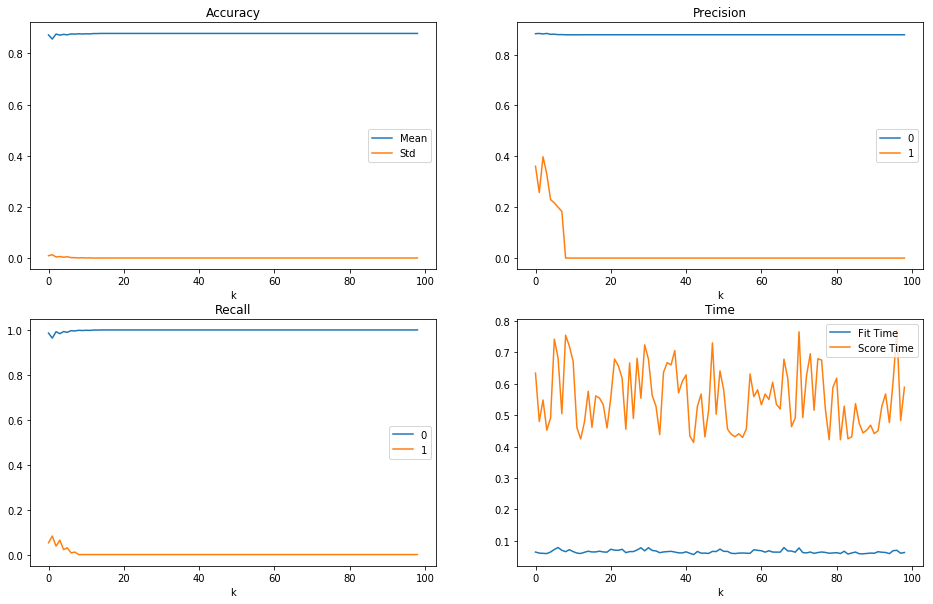

In [47]:
# approach 1: weights uniform, algorithm brute, values source
knn_test(Xdata_s_imp_dummy, Ydata_s, weights="uniform", algorithm="brute")

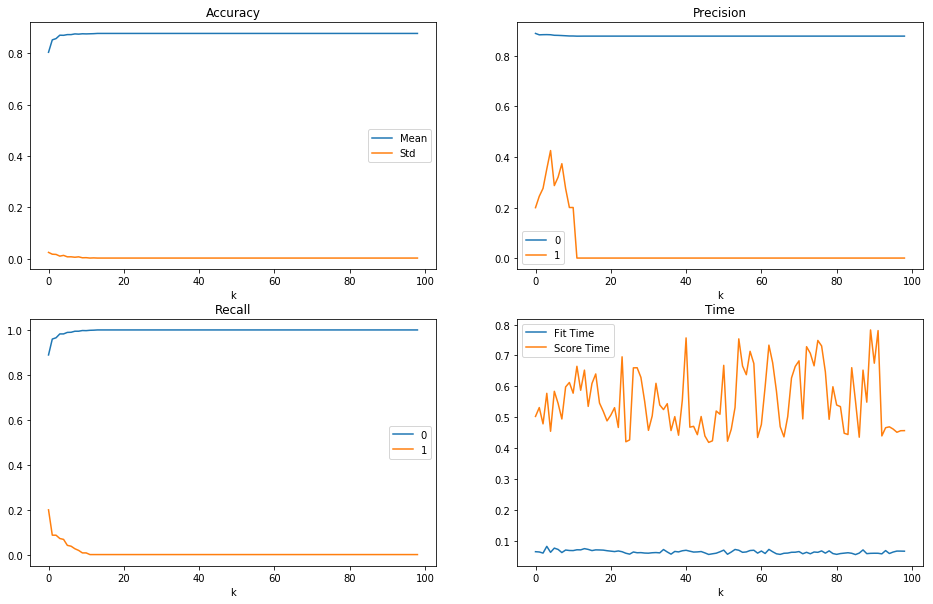

In [48]:
# approach 2: weights distance, algorithm brute, values source
knn_test(Xdata_s_imp_dummy, Ydata_s, weights="distance", algorithm="brute")

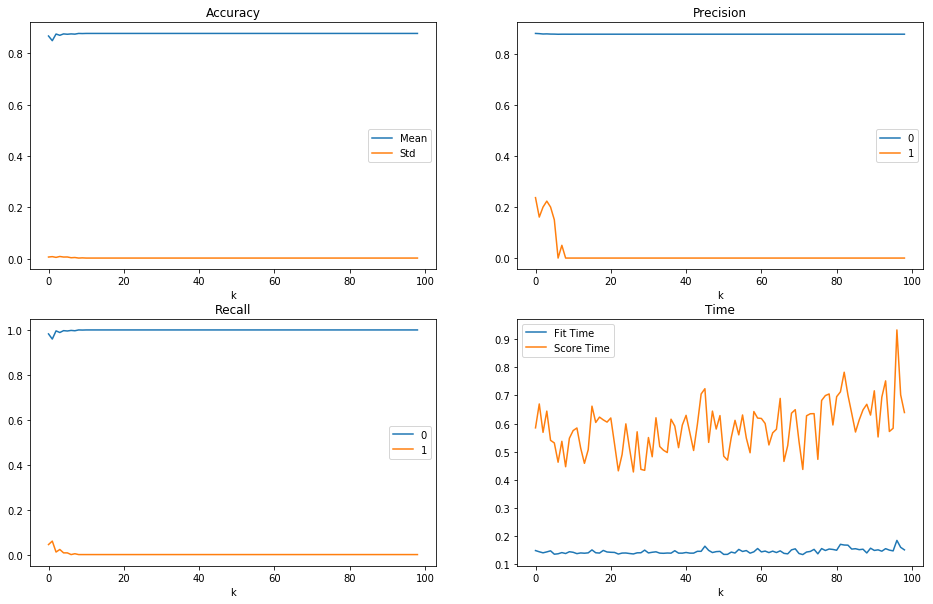

In [49]:
# approach 3: weights uniform, algorithm brute, values scaled
# min-max scaling
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata_s_imp_dummy)

knn_test(X_minmax, Ydata_s, weights="uniform", algorithm="brute")

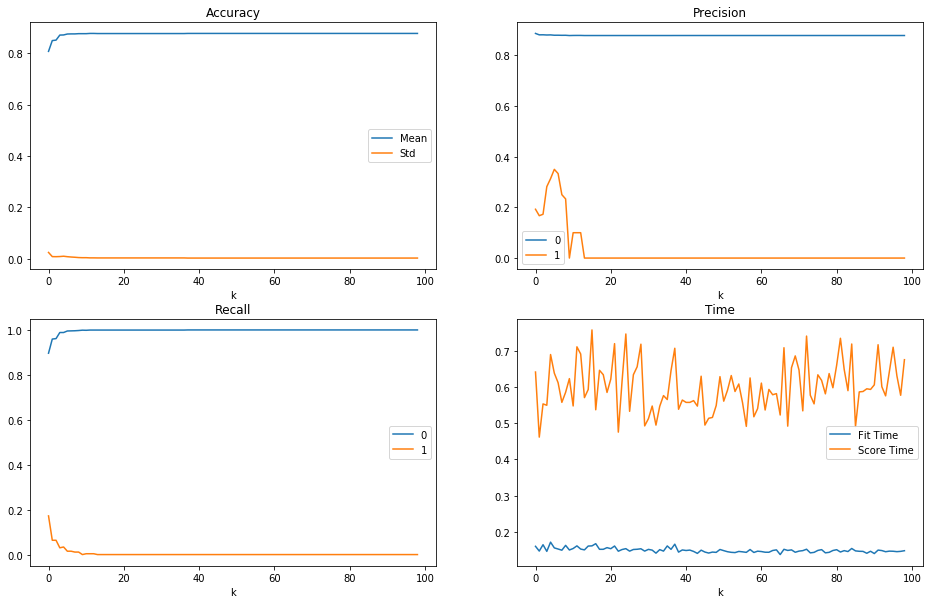

In [50]:
# approach 4: weights distance, algorithm brute, values scaled
knn_test(X_minmax, Ydata_s, weights="distance", algorithm = "brute")

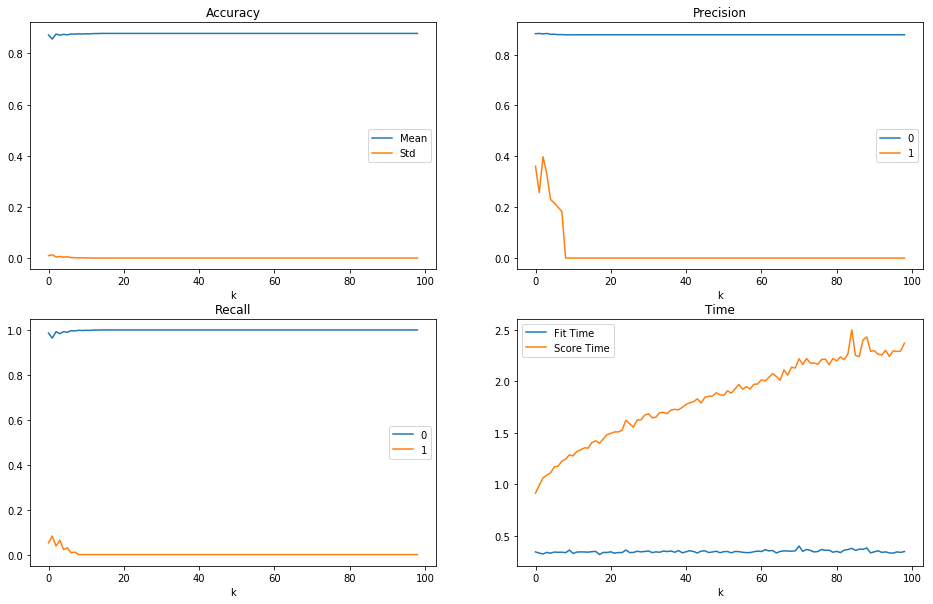

In [51]:
# approach 5: weights uniform, algorithm kd_tree, values source
knn_test(Xdata_s_imp_dummy, Ydata_s, weights="uniform", algorithm="kd_tree")

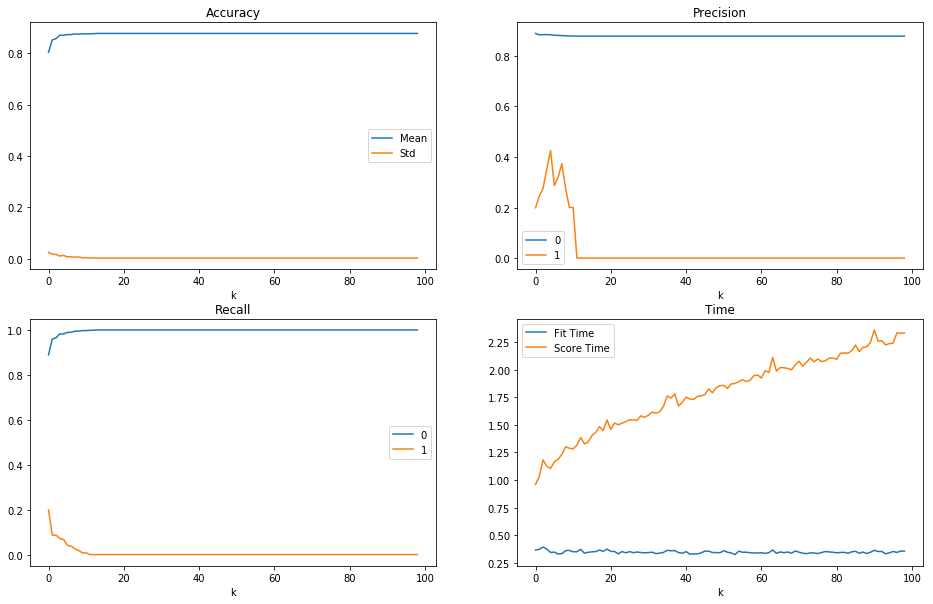

In [32]:
# approach 6: weights distance, algorithm kd_tree, values source
knn_test(Xdata_s_imp_dummy, Ydata_s, weights="distance", algorithm="kd_tree")

In [34]:
# approach 7: weights distance, algorithm kd_tree, values scaled
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata_s_imp_dummy)
knn_test(X_minmax, Ydata_s, weights="distance", algorithm="kd_tree")

KeyboardInterrupt: 

In [ ]:
# approach 8: weights uniform, algorithm kd_tree, values scaled
knn_test(X_minmax, Ydata_s, weights="uniform", algorithm="kd_tree")

#### 4.2. Naive Bayes classifier implementation

In [35]:
def naive_test(classifier, Xdata, Ydata):
    precision_accumulator = []
    recall_accumulator = []
    def my_precision(y_true, y_pred, **kwargs):
        precisions = precision_score(y_true, y_pred, **kwargs)
        nonlocal precision_accumulator
        precision_accumulator.append(precisions)
        return precisions.mean()

    ### always specify a list to save results before every call
    def my_recall(y_true, y_pred, **kwargs):
        recalls = recall_score(y_true, y_pred, **kwargs)
        nonlocal recall_accumulator
        recall_accumulator.append(recalls)
        return recalls.mean()
    scoring = {"accuracy":"accuracy", "precision":make_scorer(my_precision, average=None), "recall":make_scorer(my_recall, average=None)}
    
    scores = cross_validate(classifier, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
       
    prec_means = get_mean(precision_accumulator)
    prec_stds = get_std(precision_accumulator)
    rec_means = get_mean(recall_accumulator)
    rec_stds = get_std(recall_accumulator)
    
    rval = {"fit_time":scores["fit_time"].mean(), "score_time":scores["score_time"].mean(), 
            "accuracy":scores["test_accuracy"].mean(), "accuracy_std":scores["test_accuracy"].std(),
            "precision_means":prec_means, "precision_std":prec_stds, "recall_means":rec_means, "recall_std":rec_stds}
    
    for i in rval:
        print(i + ":\n", rval[i])
    
    return rval

In [36]:
from numpy import mean
##approach 1:Multinomial Naive Bayes
results = naive_test(MultinomialNB(), Xdata_s_imp_dummy, Ydata_s)

fit_time:
 0.11600658893585206
score_time:
 0.051602959632873535
accuracy:
 0.5083850697499057
accuracy_std:
 0.03593905094591058
precision_means:
 [0.9268033328657433, 0.16249709350995092]
precision_std:
 [0.015567657054498836, 0.012998723986422314]
recall_means:
 [0.47808991796200345, 0.7272079772079773]
recall_std:
 [0.0466217299908876, 0.06792696369335606]


In [37]:
## approach 2: Bernoulli Naive Bayes
results = naive_test(BernoulliNB(), Xdata_s_imp_dummy, Ydata_s)

fit_time:
 0.19531126022338868
score_time:
 0.08200454711914062
accuracy:
 0.8464987375324184
accuracy_std:
 0.012182462001879125
precision_means:
 [0.8809136084805393, 0.17385836385836387]
precision_std:
 [0.006199991516815241, 0.1118274967451333]
recall_means:
 [0.9542017487046632, 0.07150997150997151]
recall_std:
 [0.013655277961429506, 0.045533566542086554]


In [38]:
## approach 3:Gaussian Naive Bayes
results = naive_test(GaussianNB(), Xdata_s_imp_dummy, Ydata_s)

fit_time:
 0.189810848236084
score_time:
 0.06990399360656738
accuracy:
 0.7578799684668731
accuracy_std:
 0.013688474647032597
precision_means:
 [0.9009537036188853, 0.20976978806104507]
precision_std:
 [0.00932099862411521, 0.0299366084322182]
recall_means:
 [0.813733268566494, 0.35626780626780624]
recall_std:
 [0.011742280938802122, 0.0572423923073743]


#### 4.3. Random Forest classifier implementation

In [39]:
def test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 2, min_samples_leaf = 1):
    accuracy_mean = []
    accuracy_std = []
    fit_time = []
    score_time = []
    number_of_classes = len(Ydata.unique())

    ### list for each target class
    precision_mean = [ [] for i in range(number_of_classes) ]
    precision_std = [ [] for i in range(number_of_classes) ]
    recall_mean = [ [] for i in range(number_of_classes) ]
    recall_std = [ [] for i in range(number_of_classes) ]  
    recall_accumulator = []
    precision_accumulator = []
    ### always specify a list to save results before every call
    def my_precision(y_true, y_pred, **kwargs):
        precisions = precision_score(y_true, y_pred, **kwargs)
        nonlocal precision_accumulator
        precision_accumulator.append(precisions)
        return precisions.mean()

    ### always specify a list to save results before every call
    def my_recall(y_true, y_pred, **kwargs):
        recalls = recall_score(y_true, y_pred, **kwargs)
        nonlocal recall_accumulator
        recall_accumulator.append(recalls)
        return recalls.mean()
    scoring = {"accuracy":"accuracy", "precision":make_scorer(my_precision, average=None), "recall":make_scorer(my_recall, average=None)}
 
    xaxis = []
    
    for i in range(10, 201, 10):
        xaxis.append(i)
    
    for i in range(10, 201, 10):
        rfc = RandomForestClassifier(n_estimators=i, criterion=criterion, min_samples_split=min_samples_split)
        scores = cross_validate(rfc, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
    
        accuracy_mean.append(scores["test_accuracy"].mean())
        accuracy_std.append(scores["test_accuracy"].std())
        fit_time.append(scores["fit_time"].mean())
        score_time.append(scores["score_time"].mean())
        
        prec_means = get_mean(precision_accumulator)
        prec_stds = get_std(precision_accumulator)
        rec_means = get_mean(recall_accumulator)
        rec_stds = get_std(recall_accumulator)
        

             
        for i in range(number_of_classes):
            precision_mean[i].append(prec_means[i])
            precision_std.append(prec_stds[i])
            recall_mean[i].append(rec_means[i])
            recall_std[i].append(rec_stds[i])

    
    #Plot
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(accuracy_mean)
    plt.plot(accuracy_std)
    plt.title("Accuracy")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,2)
    for i in range(number_of_classes):
        plt.plot(precision_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Precision")
    plt.xlabel("k")
    plt.subplot(2,2,3)
    for i in range(number_of_classes):
        plt.plot(recall_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Recall")
    plt.xlabel("k")
    plt.legend(sorted(Ydata.unique()))
    plt.subplot(2,2,4)
    plt.plot(fit_time)
    plt.plot(score_time)
    plt.title("Time")
    plt.xlabel("k")
    plt.legend(("Fit Time", "Score Time"))

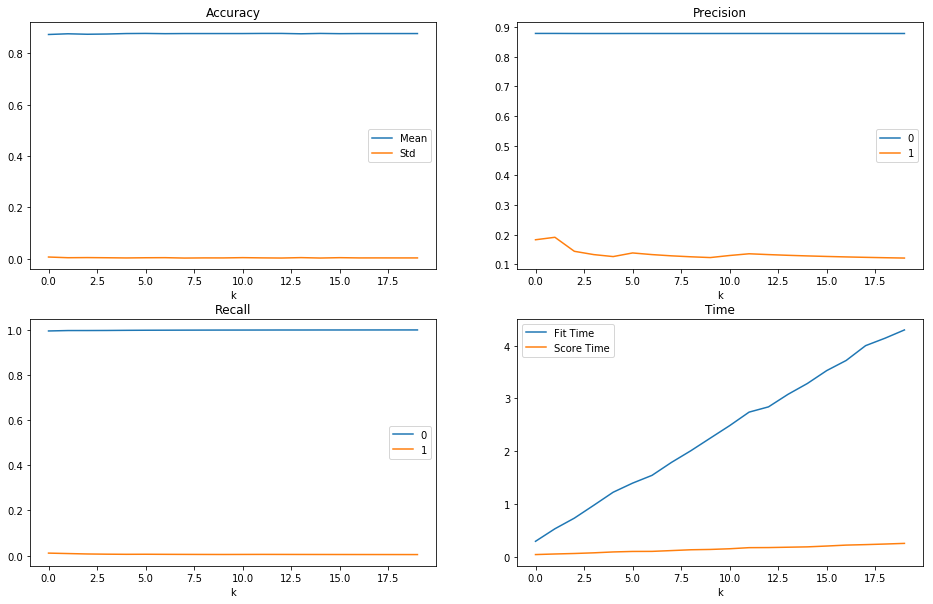

In [40]:
# aproach 1: criterion gini, min_sample_split 2
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "gini", min_samples_split = 2, min_samples_leaf = 1)

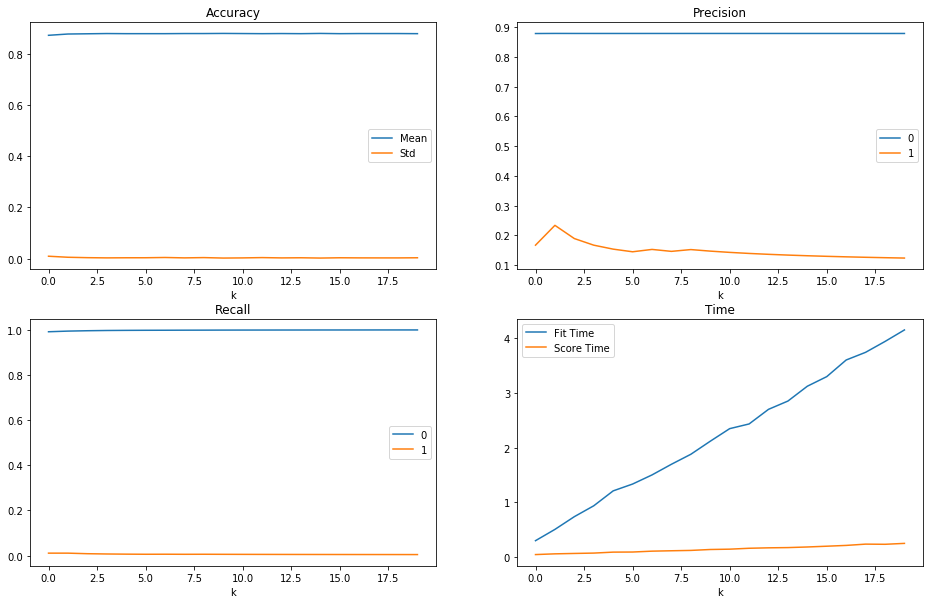

In [42]:
# aproach 2: criterion gini, min_sample_split 5
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "gini", min_samples_split = 5, min_samples_leaf = 1)

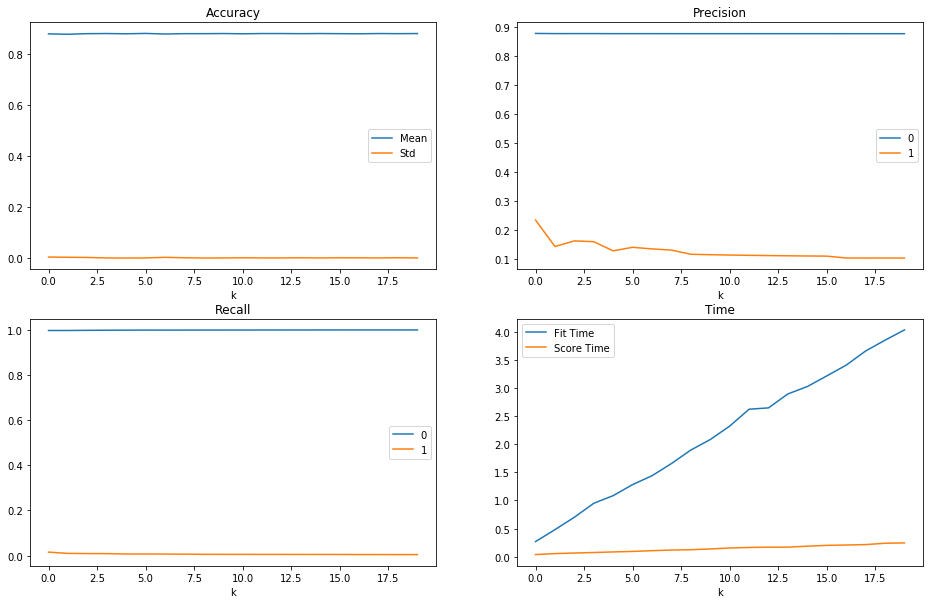

In [43]:
# aproach 3: criterion gini, min_sample_split 10
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "gini", min_samples_split = 10, min_samples_leaf = 1)

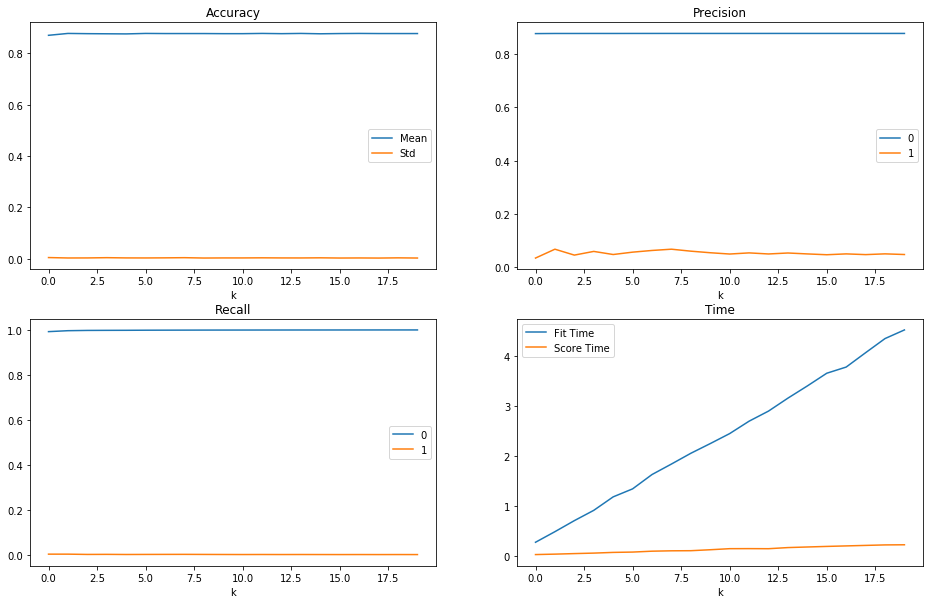

In [41]:
# aproach 4: criterion entropy, min_sample_split 2
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "entropy", min_samples_split = 2, min_samples_leaf = 1)

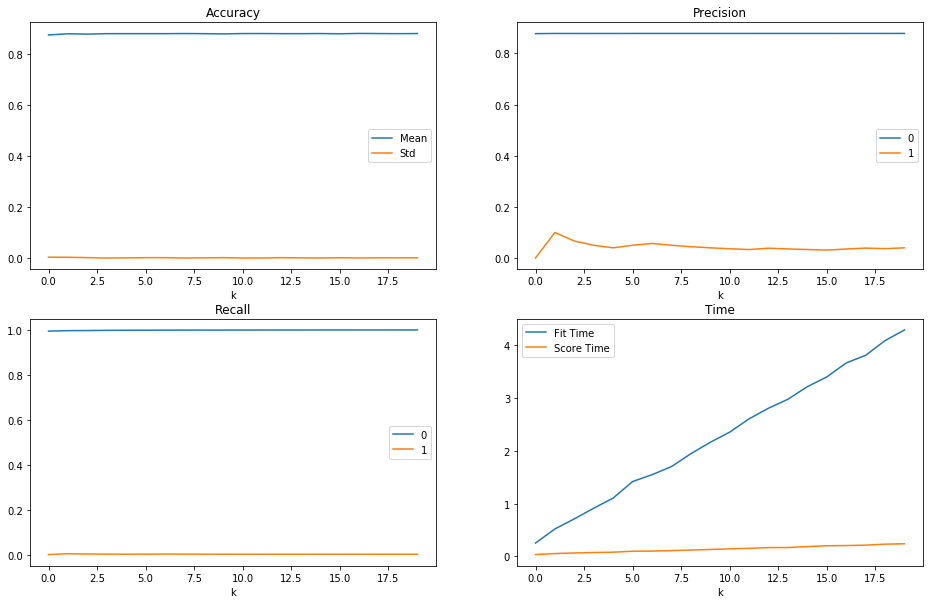

In [44]:
# aproach 5: criterion entropy, min_sample_split 5
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "entropy", min_samples_split = 5, min_samples_leaf = 1)

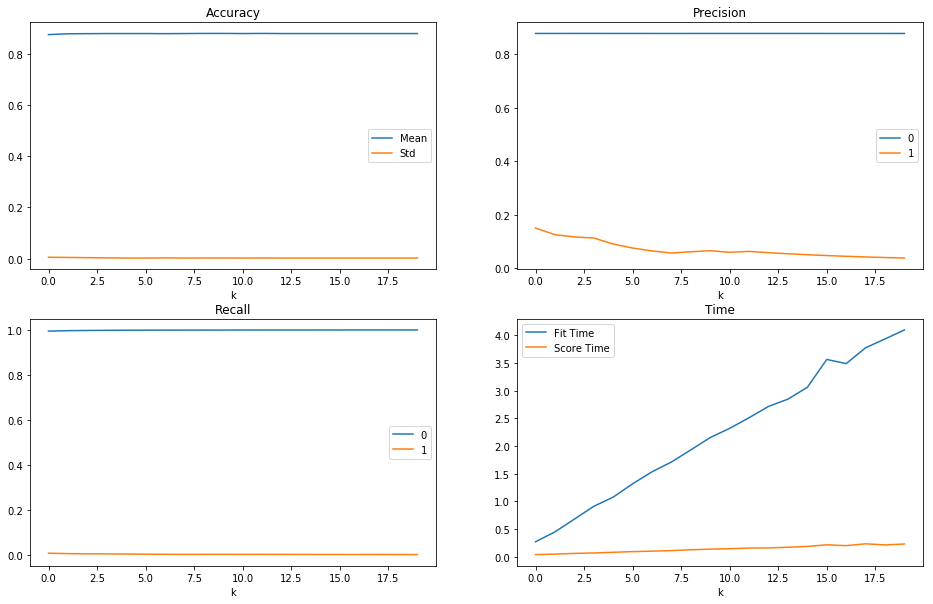

In [45]:
# aproach 6: criterion entropy, min_sample_split 10
test_rfc(Xdata_s_imp_dummy, Ydata_s, criterion = "entropy", min_samples_split = 10, min_samples_leaf = 1)

### 5. Conclusions